In [10]:
import tensorflow as tf
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df= pd.read_csv('Data/train.csv')
#df = df[:1000]
all_id = np.array(df['Id'])
len(all_id)

9912

In [3]:
IMG_SIZE = 128
colours = 3
pictures = np.zeros((len(all_id), IMG_SIZE, IMG_SIZE, colours))
pictures.shape

(9912, 128, 128, 3)

In [4]:
for i, data_id in tqdm.tqdm(enumerate(all_id)):
    img = cv2.cvtColor(cv2.imread(f"Data/train/{df['Id'][i]}.jpg"), cv2.COLOR_BGR2RGB)
    new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    pictures[i] = new_img/255
#     plt.imshow(pictures[i])
#     plt.savefig(f'picture{i}.png')

9912it [01:35, 103.67it/s]


In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(pictures, df['Pawpularity'], test_size=0.2, random_state=42)

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
X_train.shape, X_valid.shape, X_test.shape

((5946, 128, 128, 3), (1983, 128, 128, 3), (1983, 128, 128, 3))

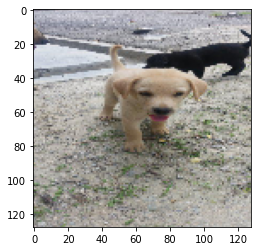

In [7]:
plt.imshow(pictures[0])

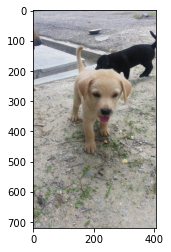

In [8]:
plt.imshow(cv2.cvtColor(cv2.imread(f"Data/train/{df['Id'][0]}.jpg"), cv2.COLOR_BGR2RGB))

In [9]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[IMG_SIZE, IMG_SIZE, 3]),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='relu')
])

model_2.compile(loss=tf.keras.losses.mae, optimizer="nadam", metrics=["mse"])

history_1 = model_2.fit(X_train, y_train, epochs=2)

Epoch 1/2
186/186 [==============================] - 230s 1s/step - loss: 20.3123 - mse: 1375.1493
Epoch 2/2
186/186 [==============================] - 230s 1s/step - loss: 16.9100 - mse: 533.5627


In [11]:
mean_squared_error(y_test, model_2.predict(X_test))

572.5289655358301

In [21]:
df_compet= pd.read_csv('Data/test.csv')
compet_id = df_compet['Id']
compet_pict = np.zeros((len(df_compet),IMG_SIZE,IMG_SIZE), )
for element in compet_id:
    new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    compet_pict.append(new_img/255)
model_2.predict(compet_pict[0])

ValueError: in user code:

    D:\Programy\Anaconda\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    D:\Programy\Anaconda\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\Programy\Anaconda\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\Programy\Anaconda\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\Programy\Anaconda\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\Programy\Anaconda\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    D:\Programy\Anaconda\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    D:\Programy\Anaconda\envs\tf\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    D:\Programy\Anaconda\envs\tf\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [32, 128, 3]
